In [1]:
import urllib.request
import json
import dml
import prov.model
import datetime 
import uuid
import time

In [2]:
client = dml.pymongo.MongoClient()
repo = client.repo
repo.authenticate('minteng_tigerlei_zhidou', 'minteng_tigerlei_zhidou')

True

In [3]:
#boston bound
lat_range=[42.22788, 42.399531]
lng_range=[-71.191113, -70.922160]
center=[sum(lat_range)/2,sum(lng_range)/2]

def check(x,y):
    if lat_range[0]<=x<=lat_range[1] and lng_range[0]<=y<=lng_range[1]:
        return True
    return False

x1=[];y1=[]
food_total=repo['minteng_tigerlei_zhidou.location'].find({'type':'food'})
for i in food_total:
    if check(i['location'][0],i['location'][1]):
        x1.append(i['location'][0])
        y1.append(i['location'][1])
    
x2=[];y2=[]
transport_total=repo['minteng_tigerlei_zhidou.location'].find({'type':'transport'})
for i in transport_total:
    if check(i['location'][0],i['location'][1]):
        x2.append(i['location'][0])
        y2.append(i['location'][1])
    
x3=[];y3=[]
crime_total=repo['minteng_tigerlei_zhidou.location'].find({'type':'crime'})
for i in crime_total:
    if check(i['location'][0],i['location'][1]):
        x3.append(i['location'][0])
        y3.append(i['location'][1])

In [4]:
import gmplot
gmap = gmplot.GoogleMapPlotter(center[0], center[1], 12.95)

#gmap.plot(x1, y1, 'cornflowerblue', edge_width=10)


gmap.scatter(x1, y1, 'b', size=25, marker=False)
gmap.scatter(x2, y2, 'r', size=25, marker=False)
gmap.scatter(x3, y3, 'grey', size=14, marker=False)

#gmap.scatter(x1, y1, 'k', marker=True)
#gmap.heatmap(x3, y3)



k=10
d1=lat_range[1]-lat_range[0]
d2=lng_range[1]-lng_range[0]

gmap.grid(lat_range[0],lat_range[1],d1/k,lng_range[0],lng_range[1],d2/k)

gmap.draw("visualization/Boston_Grid_Count.html")

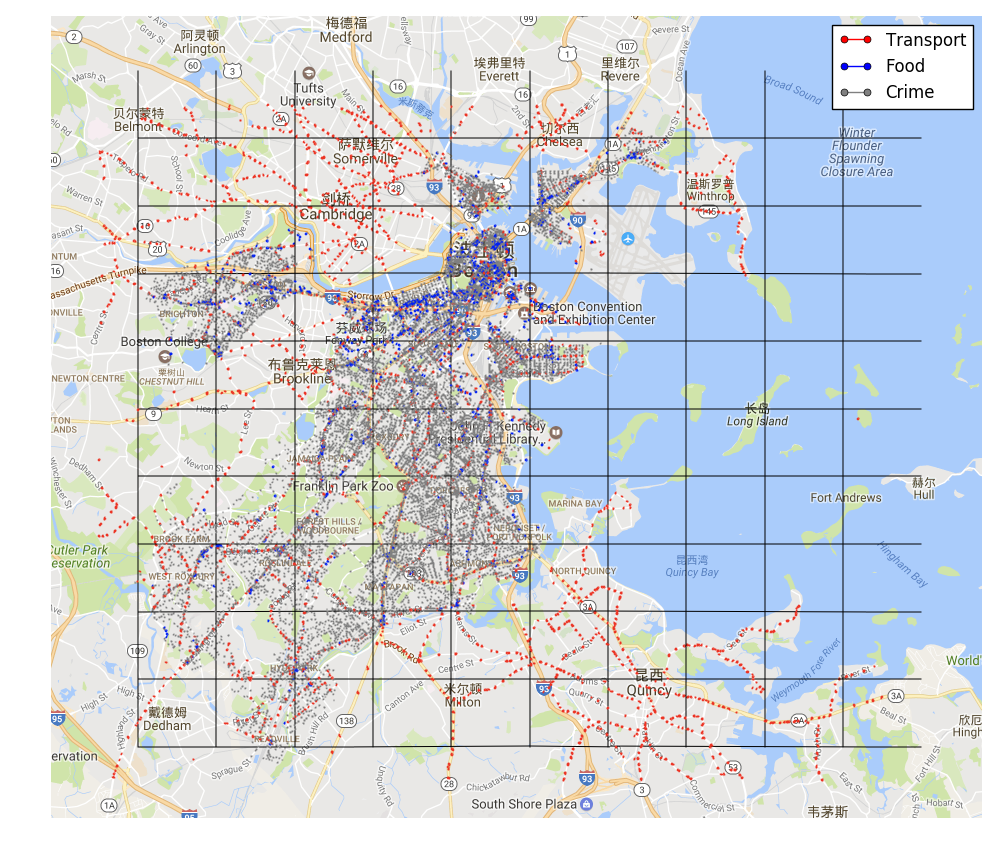

In [5]:
# after generate a html, we make a screenshot to save/show it easily
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
im =plt.imread('visualization/map.png')

###just for label
label1=plt.plot([1800,1800],marker='o',markersize=5,color='r',label='Transport')
label2=plt.plot([1800,1800],marker='o',markersize=5,color='b',label='Food')
label3=plt.plot([1800,1800],marker='o',markersize=5,color='grey',label='Crime')

implot = plt.imshow(im,zorder=0)

plt.legend()
plt.axis('off')
plt.show()